In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp
import scipy.stats as stats
plt.style.use('ggplot')

import seaborn as sns

In [2]:
data_10y = pd.read_csv('inc5000-10years.csv',engine = 'python')

In [3]:
data_e = data_10y.rename(columns={"_ - rank":"rank", "_ - city":"city", "_ - growth":"growth%", "_ - workers":"worker-size", "_ - company":"company", "_ - state_s":"state", "_ - revenue":"revenue", "_ - founded":"founded", "_ - industry":"industry", "_ - yrs_on_list":"years-on-list", "_ - metro":"metro"})
data_e = data_e.drop(['_ - state_l'], axis=1)
data_e['metro'].fillna('Nonmetro', inplace=True)
data_e['worker-size'] = data_e['worker-size'].astype('Int64')
data_e['industry'].fillna('Undefined', inplace=True)
data_e = data_e[['year', 'rank', 'company', 'industry', 'state', 'city', 'metro', 'worker-size', 'revenue', 'growth%', 'years-on-list']]

In [4]:
#data_1[data_1.isnull().any(axis=1)]

In [5]:
df_1 = data_e

In [6]:
df_1['year'] = df_1['year'].astype('int64')

In [7]:
df_5000 = df_1

In [8]:
df_5000.describe()

,year,rank,worker-size,revenue,growth%,years-on-list
count,50197.000000,50197.000000,50192.000000,5.019600e+04,50193.000000,50197.000000
mean,2012.427257,2491.819471,247.094796,4.847879e+07,404.462468,3.896229
std,2.962329,1473.875855,2225.938097,3.399313e+08,1598.945707,2.317652
min,2007.000000,1.000000,0.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1232.000000,24.000000,4.889050e+06,68.324300,2.000000
50%,2012.000000,2475.000000,50.000000,1.037105e+07,131.229900,3.000000
75%,2015.000000,3727.000000,127.000000,2.693198e+07,297.942900,5.000000
max,2017.000000,9999.000000,194000.000000,3.068300e+10,158956.910600,13.000000


In [9]:
#EDA Q1: which industry per year. (pie chart) Visulization
df_5000['industry'].unique()


array(['Consumer Products & Services', 'Energy', 'Retail',
       'Business Products & Services', 'Software',
       'Advertising & Marketing', 'Health', 'Government Services',
       'Financial Services', 'IT Services', 'Food & Beverage',
       'Real Estate', 'Manufacturing', 'Education',
       'Logistics & Transportation', 'Security', 'Media', 'Insurance',
       'Construction', 'Telecommunications', 'Travel & Hospitality',
       'Human Resources', 'Computer Hardware', 'Engineering',
       'Environmental Services', 'Undefined'], dtype=object)

In [10]:
df_5000.describe()

,year,rank,worker-size,revenue,growth%,years-on-list
count,50197.000000,50197.000000,50192.000000,5.019600e+04,50193.000000,50197.000000
mean,2012.427257,2491.819471,247.094796,4.847879e+07,404.462468,3.896229
std,2.962329,1473.875855,2225.938097,3.399313e+08,1598.945707,2.317652
min,2007.000000,1.000000,0.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1232.000000,24.000000,4.889050e+06,68.324300,2.000000
50%,2012.000000,2475.000000,50.000000,1.037105e+07,131.229900,3.000000
75%,2015.000000,3727.000000,127.000000,2.693198e+07,297.942900,5.000000
max,2017.000000,9999.000000,194000.000000,3.068300e+10,158956.910600,13.000000


In [11]:
df_5000 = df_5000[df_5000.industry != 'Undefined']

In [12]:
df_5000['industry'].unique()

array(['Consumer Products & Services', 'Energy', 'Retail',
       'Business Products & Services', 'Software',
       'Advertising & Marketing', 'Health', 'Government Services',
       'Financial Services', 'IT Services', 'Food & Beverage',
       'Real Estate', 'Manufacturing', 'Education',
       'Logistics & Transportation', 'Security', 'Media', 'Insurance',
       'Construction', 'Telecommunications', 'Travel & Hospitality',
       'Human Resources', 'Computer Hardware', 'Engineering',
       'Environmental Services'], dtype=object)

In [13]:
df = df_5000.industry.value_counts()

In [14]:
df

IT Services                     6642
Business Products & Services    5034
Advertising & Marketing         4407
Health                          3757
Software                        3200
Government Services             2507
Manufacturing                   2454
Construction                    2411
Financial Services              2396
Consumer Products & Services    2195
Human Resources                 1887
Retail                          1865
Food & Beverage                 1400
Telecommunications              1398
Logistics & Transportation      1393
Real Estate                     1040
Energy                          1012
Engineering                      842
Education                        769
Security                         717
Insurance                        677
Media                            626
Environmental Services           618
Travel & Hospitality             513
Computer Hardware                405
Name: industry, dtype: int64

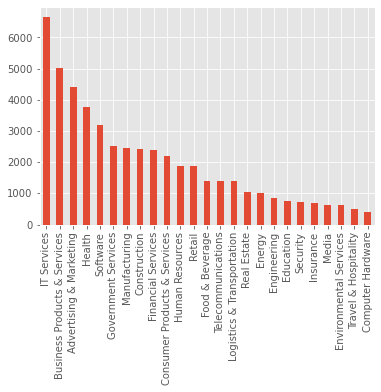

In [15]:
ax = df.plot.bar(x='industry', y='count')

In [16]:
df.head(10)

IT Services                     6642
Business Products & Services    5034
Advertising & Marketing         4407
Health                          3757
Software                        3200
Government Services             2507
Manufacturing                   2454
Construction                    2411
Financial Services              2396
Consumer Products & Services    2195
Name: industry, dtype: int64

In [17]:
df_growth = df_5000.groupby('industry', as_index=False)['growth%'].mean()

In [18]:
df_growth

,industry,growth%
0,Advertising & Marketing,461.872636
1,Business Products & Services,309.383732
2,Computer Hardware,325.729313
3,Construction,295.996123
4,Consumer Products & Services,669.875398
5,Education,364.515559
6,Energy,827.636156
7,Engineering,194.017663
8,Environmental Services,196.434373
9,Financial Services,522.374767


In [19]:
df_growth_desc = df_growth.sort_values(by='growth%', ascending=False)

In [20]:
df_growth_desc

,industry,growth%
6,Energy,827.636156
4,Consumer Products & Services,669.875398
11,Government Services,557.445191
9,Financial Services,522.374767
20,Retail,515.709130
19,Real Estate,502.053996
10,Food & Beverage,472.220974
22,Software,463.976546
0,Advertising & Marketing,461.872636
18,Media,452.207576


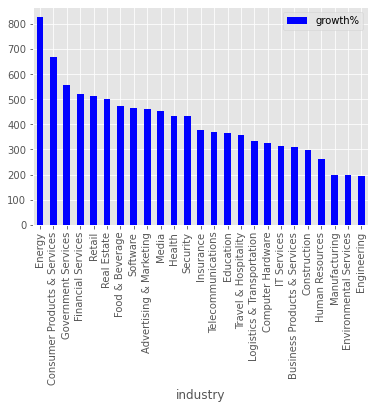

In [21]:
ax = df_growth_desc.plot.bar(x='industry', y='growth%', color='blue')

In [22]:
df_5000.replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/XuanQin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
#rows_with_inf = df_5000[df_5000.apply(lambda x: any(np.isinf(x)), axis=1)]

In [24]:
df_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50165 entries, 0 to 50196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           50165 non-null  int64  
 1   rank           50165 non-null  int64  
 2   company        50165 non-null  object 
 3   industry       50165 non-null  object 
 4   state          50165 non-null  object 
 5   city           50165 non-null  object 
 6   metro          50165 non-null  object 
 7   worker-size    50160 non-null  object 
 8   revenue        50164 non-null  float64
 9   growth%        50161 non-null  float64
 10  years-on-list  50165 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.6+ MB


In [25]:
df_5000.describe()

,year,rank,revenue,growth%,years-on-list
count,50165.000000,50165.000000,5.016400e+04,50161.000000,50165.000000
mean,2012.427529,2491.566331,4.822288e+07,404.627882,3.895325
std,2.961383,1474.029708,3.394244e+08,1599.440061,2.315556
min,2007.000000,1.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1231.000000,4.887288e+06,68.312600,2.000000
50%,2012.000000,2474.000000,1.036519e+07,131.241300,3.000000
75%,2015.000000,3727.000000,2.690239e+07,298.023500,5.000000
max,2017.000000,9999.000000,3.068300e+10,158956.910600,13.000000


In [26]:
df_5000.dropna(subset=['revenue'])

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list
0,2016,1,Loot Crate,Consumer Products & Services,CA,Los Angeles,Los Angeles,218,116247698.0,66788.5962,1
1,2016,2,Paint Nite,Consumer Products & Services,MA,Somerville,Boston,100,55018793.0,36555.2472,2
2,2016,3,CalCom Solar,Energy,CA,Visalia,"Visalia-Porterville, CA",47,33507450.0,31633.5448,2
3,2016,4,eLuxurySupply.com,Retail,IN,Evansville,"Evansville, IN-KY",82,30695215.0,23619.7198,2
4,2016,5,Company.com,Business Products & Services,GA,Atlanta,Atlanta,48,33370967.0,23486.8894,2
...,...,...,...,...,...,...,...,...,...,...,...
50192,2017,4996,Sonic Boom Wellness,Health,CA,Carlsbad,San Diego,41,4870873.0,40.2025,5
50193,2017,4997,Planet DDS,Software,CA,Costa Mesa,Los Angeles,28,6242863.0,40.1933,1
50194,2017,4998,J. Jill,Retail,MA,Quincy,Boston,3801,639056000.0,40.1359,1
50195,2017,4999,STS Aviation Group,Logistics & Transportation,FL,Jensen Beach,"Port St. Lucie, FL",1704,232056990.0,40.1260,5


In [27]:
df_5000[df_5000['revenue'].isnull()]

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list
32828,2010,2938,SaveAround,Advertising & Marketing,NY,BINGHAMTON,"Binghamton, NY",<NA>,NaN,NaN,7


In [28]:
df_revenue = df_5000.groupby('industry', as_index=False)['revenue'].mean()

In [29]:
df_revenue

,industry,revenue
0,Advertising & Marketing,1.716549e+07
1,Business Products & Services,6.686446e+07
2,Computer Hardware,1.769577e+08
3,Construction,5.820661e+07
4,Consumer Products & Services,6.579798e+07
5,Education,1.778448e+07
6,Energy,1.121021e+08
7,Engineering,2.237278e+07
8,Environmental Services,3.137284e+07
9,Financial Services,5.012607e+07


In [30]:
df_revenue['revenue'] = df_revenue['revenue'] /(10**6)

In [31]:
df_revenue

,industry,revenue
0,Advertising & Marketing,17.165485
1,Business Products & Services,66.864459
2,Computer Hardware,176.957671
3,Construction,58.206610
4,Consumer Products & Services,65.797981
5,Education,17.784478
6,Energy,112.102136
7,Engineering,22.372782
8,Environmental Services,31.372844
9,Financial Services,50.126067


In [32]:
df_revenue_M = df_revenue.rename(columns={"revenue":"revenue(M)"})

In [33]:
df_revenue_M

,industry,revenue(M)
0,Advertising & Marketing,17.165485
1,Business Products & Services,66.864459
2,Computer Hardware,176.957671
3,Construction,58.206610
4,Consumer Products & Services,65.797981
5,Education,17.784478
6,Energy,112.102136
7,Engineering,22.372782
8,Environmental Services,31.372844
9,Financial Services,50.126067


In [34]:
df_5000.describe()

,year,rank,revenue,growth%,years-on-list
count,50165.000000,50165.000000,5.016400e+04,50161.000000,50165.000000
mean,2012.427529,2491.566331,4.822288e+07,404.627882,3.895325
std,2.961383,1474.029708,3.394244e+08,1599.440061,2.315556
min,2007.000000,1.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1231.000000,4.887288e+06,68.312600,2.000000
50%,2012.000000,2474.000000,1.036519e+07,131.241300,3.000000
75%,2015.000000,3727.000000,2.690239e+07,298.023500,5.000000
max,2017.000000,9999.000000,3.068300e+10,158956.910600,13.000000


In [35]:
df_5000[df_5000['worker-size'].isnull()]

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list
32828,2010,2938,SaveAround,Advertising & Marketing,NY,BINGHAMTON,"Binghamton, NY",<NA>,NaN,NaN,7
43924,2007,1812,eAccess Solutions,Telecommunications,IL,Palatine,Nonmetro,<NA>,6600000.0,200.0000,3
44713,2007,3600,Drexel Building Supply,Construction,WI,Campbellsport,"Milwaukee-Waukesha-West Allis, WI",<NA>,28525000.0,80.0934,8
44920,2007,4132,LEGACY Supply Chain Services,Logistics & Transportation,NH,Portsmouth,Boston,<NA>,18169219.0,57.3698,9
44955,2007,4239,AB Data,Advertising & Marketing,WI,Milwaukee,"Milwaukee-Waukesha-West Allis, WI",<NA>,30435084.0,52.9840,5


In [36]:
df_5000.dropna(subset=['worker-size'])

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list
0,2016,1,Loot Crate,Consumer Products & Services,CA,Los Angeles,Los Angeles,218,116247698.0,66788.5962,1
1,2016,2,Paint Nite,Consumer Products & Services,MA,Somerville,Boston,100,55018793.0,36555.2472,2
2,2016,3,CalCom Solar,Energy,CA,Visalia,"Visalia-Porterville, CA",47,33507450.0,31633.5448,2
3,2016,4,eLuxurySupply.com,Retail,IN,Evansville,"Evansville, IN-KY",82,30695215.0,23619.7198,2
4,2016,5,Company.com,Business Products & Services,GA,Atlanta,Atlanta,48,33370967.0,23486.8894,2
...,...,...,...,...,...,...,...,...,...,...,...
50192,2017,4996,Sonic Boom Wellness,Health,CA,Carlsbad,San Diego,41,4870873.0,40.2025,5
50193,2017,4997,Planet DDS,Software,CA,Costa Mesa,Los Angeles,28,6242863.0,40.1933,1
50194,2017,4998,J. Jill,Retail,MA,Quincy,Boston,3801,639056000.0,40.1359,1
50195,2017,4999,STS Aviation Group,Logistics & Transportation,FL,Jensen Beach,"Port St. Lucie, FL",1704,232056990.0,40.1260,5


In [37]:
df_5000.eq(0).any().any()

True

In [38]:
df_5000 = df_5000[df_5000['worker-size'] != 0]

In [39]:
df_5000.describe()

,year,rank,revenue,growth%,years-on-list
count,49995.000000,49995.000000,4.999400e+04,49991.000000,49995.000000
mean,2012.434723,2489.303670,4.793045e+07,405.514760,3.896090
std,2.959778,1473.473757,3.376879e+08,1602.036213,2.316115
min,2007.000000,1.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1229.000000,4.884869e+06,68.440200,2.000000
50%,2012.000000,2471.000000,1.035763e+07,131.494200,3.000000
75%,2015.000000,3725.000000,2.687087e+07,298.562750,5.000000
max,2017.000000,9999.000000,3.068300e+10,158956.910600,13.000000


In [40]:
df_5000['worker-size'] = df_5000['worker-size'].astype('Int64')

In [41]:
df_worker = df_5000.groupby('industry', as_index=False)['worker-size'].mean()

In [42]:
df_worker

,industry,worker-size
0,Advertising & Marketing,71.334776
1,Business Products & Services,291.664073
2,Computer Hardware,172.573201
3,Construction,181.912500
4,Consumer Products & Services,165.516674
5,Education,182.596879
6,Energy,182.498020
7,Engineering,145.802381
8,Environmental Services,160.455139
9,Financial Services,202.557692


In [43]:
df_worker_desc = df_worker.sort_values(by='worker-size', ascending=False)

In [44]:
df_worker_desc

,industry,worker-size
13,Human Resources,847.643085
21,Security,795.612587
10,Food & Beverage,705.185478
24,Travel & Hospitality,513.400391
12,Health,434.021623
1,Business Products & Services,291.664073
20,Retail,235.620894
16,Logistics & Transportation,208.556679
9,Financial Services,202.557692
23,Telecommunications,191.648454


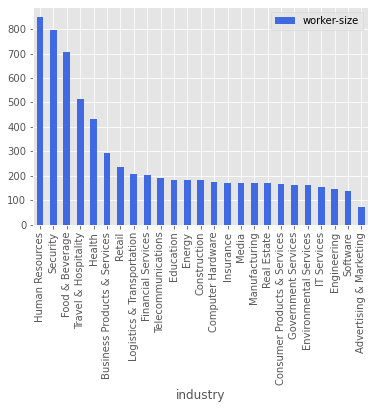

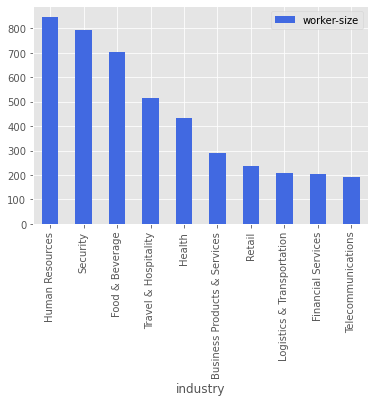

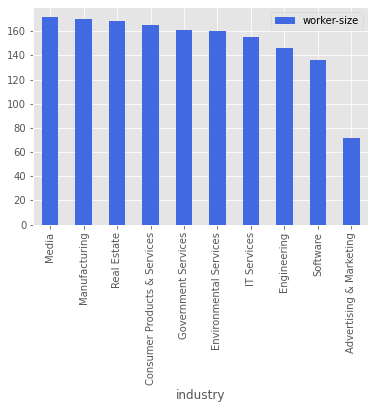

In [45]:
ax = df_worker_desc.plot.bar(x='industry', y='worker-size', color='royalblue')
ax2 = df_worker_desc.head(10).plot.bar(x='industry', y='worker-size', color='royalblue')
ax3 = df_worker_desc.tail(10).plot.bar(x='industry', y='worker-size', color='royalblue')

In [46]:
df_5000 = df_5000.dropna(subset=['revenue'])

In [47]:
df_5000.describe()

,year,rank,worker-size,revenue,growth%,years-on-list
count,49994.000000,49994.000000,49990.000000,4.999400e+04,49991.000000,49994.000000
mean,2012.434772,2489.294695,247.614663,4.793045e+07,405.514760,3.896028
std,2.959788,1473.487127,2230.194270,3.376879e+08,1602.036213,2.316096
min,2007.000000,1.000000,1.000000,0.000000e+00,0.764300,1.000000
25%,2010.000000,1229.000000,24.000000,4.884869e+06,68.440200,2.000000
50%,2012.000000,2471.000000,50.000000,1.035763e+07,131.494200,3.000000
75%,2015.000000,3725.000000,128.000000,2.687087e+07,298.562750,5.000000
max,2017.000000,9999.000000,194000.000000,3.068300e+10,158956.910600,13.000000


In [48]:
df_5000['revenue-per-capita(M)'] = df_5000['revenue']/df_5000['worker-size']

In [49]:
df_5000

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
0,2016,1,Loot Crate,Consumer Products & Services,CA,Los Angeles,Los Angeles,218,116247698.0,66788.5962,1,533246.321101
1,2016,2,Paint Nite,Consumer Products & Services,MA,Somerville,Boston,100,55018793.0,36555.2472,2,550187.930000
2,2016,3,CalCom Solar,Energy,CA,Visalia,"Visalia-Porterville, CA",47,33507450.0,31633.5448,2,712924.468085
3,2016,4,eLuxurySupply.com,Retail,IN,Evansville,"Evansville, IN-KY",82,30695215.0,23619.7198,2,374331.890244
4,2016,5,Company.com,Business Products & Services,GA,Atlanta,Atlanta,48,33370967.0,23486.8894,2,695228.479167
...,...,...,...,...,...,...,...,...,...,...,...,...
50192,2017,4996,Sonic Boom Wellness,Health,CA,Carlsbad,San Diego,41,4870873.0,40.2025,5,118801.780488
50193,2017,4997,Planet DDS,Software,CA,Costa Mesa,Los Angeles,28,6242863.0,40.1933,1,222959.392857
50194,2017,4998,J. Jill,Retail,MA,Quincy,Boston,3801,639056000.0,40.1359,1,168128.387267
50195,2017,4999,STS Aviation Group,Logistics & Transportation,FL,Jensen Beach,"Port St. Lucie, FL",1704,232056990.0,40.1260,5,136183.679577


In [50]:
df_percap = df_5000.groupby('industry', as_index=False)['revenue-per-capita(M)'].mean()
df_percap_desc = df_percap.sort_values(by='revenue-per-capita(M)', ascending=False)

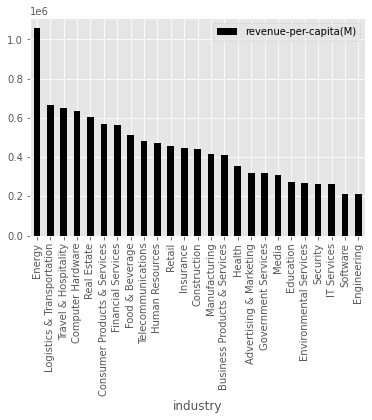

In [51]:
ax = df_percap_desc.plot.bar(x='industry', y='revenue-per-capita(M)', color='black')

In [52]:
df_r_g = df_revenue_M.merge(df_growth)

In [53]:
df_r_g

,industry,revenue(M),growth%
0,Advertising & Marketing,17.165485,461.872636
1,Business Products & Services,66.864459,309.383732
2,Computer Hardware,176.957671,325.729313
3,Construction,58.206610,295.996123
4,Consumer Products & Services,65.797981,669.875398
5,Education,17.784478,364.515559
6,Energy,112.102136,827.636156
7,Engineering,22.372782,194.017663
8,Environmental Services,31.372844,196.434373
9,Financial Services,50.126067,522.374767


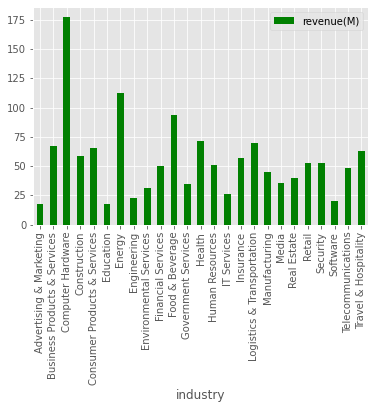

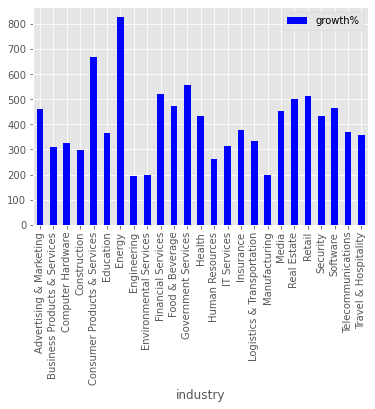

In [54]:
ax = df_r_g.plot.bar(x='industry', y='revenue(M)', color='green')
ax2 = df_r_g.plot.bar(x='industry', y='growth%', color='blue')

In [55]:
df = df_5000.industry.value_counts()

In [56]:
df

IT Services                     6621
Business Products & Services    5013
Advertising & Marketing         4392
Health                          3746
Software                        3193
Government Services             2500
Manufacturing                   2443
Construction                    2401
Financial Services              2392
Consumer Products & Services    2189
Human Resources                 1880
Retail                          1857
Telecommunications              1392
Food & Beverage                 1391
Logistics & Transportation      1386
Real Estate                     1036
Energy                          1010
Engineering                      840
Education                        769
Security                         715
Insurance                        674
Media                            626
Environmental Services           613
Travel & Hospitality             512
Computer Hardware                403
Name: industry, dtype: int64

In [57]:
#Location
df_s = df_5000.state.value_counts()
df_s
df_s_10 = df_s.head(10)

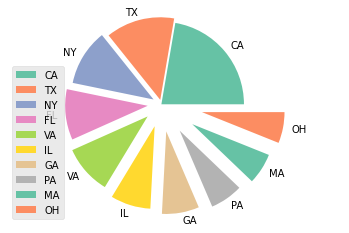

In [58]:
explode = np.linspace(0,0.5,num=10)

colors = sns.color_palette("Set2")

df_s_10.plot(kind='pie', fontsize=10, colors=colors, explode=explode)
plt.axis('equal')
plt.ylabel('')
plt.legend(loc="lower left")
plt.show()

In [59]:
df_city = df_5000.city.value_counts()
df_city_15 = df_city.head(15)

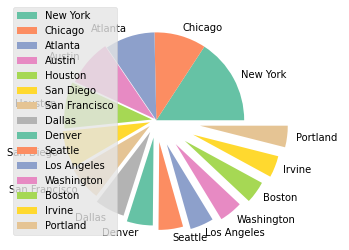

In [60]:
explode = (0,0,0,0.025,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5)

colors = sns.color_palette("Set2")

df_city_15.plot(kind='pie', fontsize=10, colors=colors, explode=explode)
plt.axis('equal')
plt.ylabel('')
plt.legend(loc="lower left")
plt.show()

In [61]:
df_metro = df_5000.metro.value_counts()
df_metro_15 = df_metro.head(15)

In [62]:
df_metro_15

New York City     3828
Washington, DC    3370
Los Angeles       2680
Chicago           2163
Atlanta           2026
Boston            1753
Dallas            1568
San Francisco     1552
Philadelphia      1448
Miami             1155
Houston           1085
Seattle            989
San Diego          974
Phoenix            962
Denver             938
Name: metro, dtype: int64

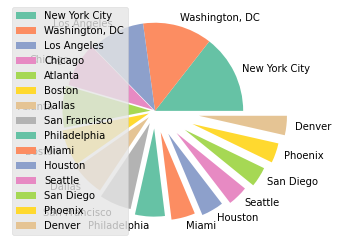

In [63]:
explode = (0,0,0,0.025,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5)
#colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          #'#00C69C', '#00E28E', '#00FF80', ]
colors = sns.color_palette("Set2")

df_metro_15.plot(kind='pie', fontsize=10, colors=colors, explode=explode)
plt.axis('equal')
plt.ylabel('')
plt.legend(loc="center left")
plt.show()

In [64]:
#Two hypothesis:
1) Is SF more favorable by IT industry b/c of Silicon valley vs New York City?
2) Does it change in the past decade the trend of IT startups?

Object `City` not found.
Object `startups` not found.


In [65]:
df_CA = df_5000.loc[df_5000['state'] == 'CA']

In [66]:
df_CA

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
0,2016,1,Loot Crate,Consumer Products & Services,CA,Los Angeles,Los Angeles,218,116247698.0,66788.5962,1,5.332463e+05
2,2016,3,CalCom Solar,Energy,CA,Visalia,"Visalia-Porterville, CA",47,33507450.0,31633.5448,2,7.129245e+05
7,2016,8,Los York,Advertising & Marketing,CA,Santa Monica,Los Angeles,25,15598837.0,14404.6093,1,6.239535e+05
12,2016,13,Suja Juice,Food & Beverage,CA,San Diego,San Diego,250,65877327.0,10511.0846,1,2.635093e+05
16,2016,17,Berkley,Manufacturing,CA,Carson,Los Angeles,15,11449478.0,9249.2602,2,7.632985e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
50182,2017,4986,Dobi & Associates,Business Products & Services,CA,San Diego,San Diego,7,17673279.0,40.9231,3,2.524754e+06
50183,2017,4987,LifeSource Water Systems,Consumer Products & Services,CA,Pasadena,Los Angeles,48,15012041.0,40.9193,1,3.127509e+05
50185,2017,4989,1Point21 Interactive,Advertising & Marketing,CA,San Diego,San Diego,33,6358086.0,40.7922,2,1.926693e+05
50192,2017,4996,Sonic Boom Wellness,Health,CA,Carlsbad,San Diego,41,4870873.0,40.2025,5,1.188018e+05


In [67]:
df_ca_metro = df_CA['metro'].value_counts()

In [68]:
df_ca_metro

Los Angeles                                      2679
San Francisco                                    1550
San Diego                                         974
San Jose                                          513
Riverside-San Bernardino-Ontario, CA              151
Oxnard-Thousand Oaks-Ventura, CA                  129
Sacramento--Arden-Arcade--Roseville, CA           106
Sacramento, CA                                     73
Bakersfield, CA                                    56
Santa Barbara-Santa Maria-Goleta, CA               49
Fresno, CA                                         44
Santa Maria-Santa Barbara, CA                      31
Modesto, CA                                        27
Santa Rosa-Petaluma, CA                            27
Salinas, CA                                        26
San Luis Obispo-Paso Robles-Arroyo Grande, CA      24
Santa Cruz-Watsonville, CA                         23
San Luis Obispo-Paso Robles, CA                    23
Santa Rosa, CA              

In [69]:
df_NY = df_5000.loc[df_5000['state'] == 'NY']

In [70]:
df_ny_metro = df_NY['metro'].value_counts()

In [71]:
df_ny_metro

New York City                            2533
Rochester, NY                             259
Albany-Schenectady-Troy, NY               165
Buffalo-Niagara Falls, NY                 109
Syracuse, NY                               57
Buffalo-Cheektowaga-Niagara Falls, NY      50
Poughkeepsie-Newburgh-Middletown, NY       27
Binghamton, NY                             13
Utica-Rome, NY                             10
Nonmetro                                   10
Ithaca, NY                                 10
Kingston, NY                                6
none                                        4
Watertown-Fort Drum, NY                     4
Auburn, NY                                  3
Glens Falls, NY                             3
Bridgeport-Stamford-Norwalk, CT             3
Olean, NY                                   2
Pittsburgh, PA                              2
Corning, NY                                 2
Plattsburgh, NY                             1
Oneonta, NY                       

In [72]:
df_nyc = df_5000.loc[df_5000['metro'] == 'New York City']
df_sfo = df_5000.loc[df_5000['metro'] == 'San Francisco']

In [73]:
df_nyc

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
6,2016,7,BounceX,Software,NY,New York,New York City,130,15733570.0,14574.6474,1,1.210275e+05
15,2016,16,Persado,Software,NY,New York,New York City,171,17432811.0,9389.7747,1,1.019463e+05
17,2016,18,Exusia,IT Services,NY,New York,New York City,185,14917600.0,8803.2659,2,8.063568e+04
30,2016,30,Taldepot.com,Retail,NY,Cedarhurst,New York City,72,14855156.0,6988.2629,2,2.063216e+05
39,2016,39,Chelsea Financial Group,Insurance,NJ,Manalapan,New York City,5,12244587.0,5961.1366,2,2.448917e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,2017,4940,Procida Construction,Construction,NY,Bronx,New York City,80,100659312.0,42.2892,1,1.258241e+06
50143,2017,4947,PREFERRED FREEZER SERVICES,Logistics & Transportation,NJ,Chatham,New York City,1881,359377000.0,41.9553,9,1.910564e+05
50156,2017,4960,The Royalty Network,Media,NY,New York City,New York City,14,7519666.0,41.5828,6,5.371190e+05
50161,2017,4965,BinaryTree,Software,NJ,Kendall Park,New York City,136,28595938.0,41.3826,9,2.102642e+05


In [74]:
df_nyc.industry.value_counts()

IT Services                     574
Advertising & Marketing         547
Business Products & Services    463
Software                        240
Health                          239
Financial Services              196
Retail                          184
Consumer Products & Services    157
Human Resources                 131
Telecommunications              131
Construction                    129
Food & Beverage                 119
Media                           111
Manufacturing                    85
Education                        69
Travel & Hospitality             68
Insurance                        62
Logistics & Transportation       54
Real Estate                      47
Environmental Services           43
Security                         42
Energy                           42
Government Services              38
Engineering                      36
Computer Hardware                21
Name: industry, dtype: int64

In [75]:
df_sfo

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
51,2016,51,Man Crates,Retail,CA,Redwood City,San Francisco,32,21630111.0,4900.1528,1,6.759410e+05
84,2016,84,InfoScout,Business Products & Services,CA,San Francisco,San Francisco,57,6774109.0,3601.6989,2,1.188440e+05
104,2016,104,ipsy,Consumer Products & Services,CA,San Mateo,San Francisco,100,169293026.0,3136.0743,1,1.692930e+06
108,2016,108,Maxton & Company,Business Products & Services,CA,San Francisco,San Francisco,8,5070758.0,3035.7496,2,6.338448e+05
147,2016,147,Touch of Modern,Consumer Products & Services,CA,San Francisco,San Francisco,136,81253170.0,2423.6898,2,5.974498e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
50026,2017,4830,National Petroleum,Energy,CA,Newark,San Francisco,35,69492616.0,45.4729,7,1.985503e+06
50050,2017,4854,KBA DOCUSYS,Business Products & Services,CA,UNION CITY,San Francisco,135,30055481.0,44.8584,7,2.226332e+05
50063,2017,4867,AEI Consultants,Environmental Services,CA,Walnut Creek,San Francisco,260,49955563.0,44.5636,1,1.921368e+05
50064,2017,4868,Netpace,IT Services,CA,San Ramon,San Francisco,60,17289980.0,44.5409,5,2.881663e+05


In [76]:
df_sfo.industry.value_counts()

Advertising & Marketing         214
IT Services                     191
Business Products & Services    176
Software                        161
Food & Beverage                  99
Human Resources                  90
Financial Services               89
Consumer Products & Services     74
Health                           68
Telecommunications               48
Energy                           42
Retail                           37
Manufacturing                    35
Media                            32
Education                        28
Construction                     24
Engineering                      24
Security                         23
Government Services              18
Real Estate                      17
Environmental Services           15
Logistics & Transportation       15
Insurance                        15
Travel & Hospitality              9
Computer Hardware                 8
Name: industry, dtype: int64

In [77]:
shared_sample_freq = (285+197) / (4209+1709)
shared_sample_variance = (4209+1709) * (shared_sample_freq * (1 - shared_sample_freq)) / (4209*1709)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [78]:
shared_sample_freq

0.08144643460628591

In [79]:
shared_sample_variance

6.155035143975527e-05

In [80]:
difference_in_proportions

In [81]:
NYC_freq = 285 / 4209
SFO_freq = 197 / 1709
difference_in_sample_proportions = SFO_freq - NYC_freq
print("Difference in sample proportions: {:2.5f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.04756


In [82]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for kickfip frequency comparison: {:2.50f}".format(p_value))

p-value for kickfip frequency comparison: 0.00000000067155214722447453823406249284744262695312


In [83]:
df_5000.describe()

,year,rank,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
count,49994.000000,49994.000000,49990.000000,4.999400e+04,49991.000000,49994.000000,4.999000e+04
mean,2012.434772,2489.294695,247.614663,4.793045e+07,405.514760,3.896028,4.039984e+05
std,2.959788,1473.487127,2230.194270,3.376879e+08,1602.036213,2.316096,1.620780e+06
min,2007.000000,1.000000,1.000000,0.000000e+00,0.764300,1.000000,0.000000e+00
25%,2010.000000,1229.000000,24.000000,4.884869e+06,68.440200,2.000000,1.222788e+05
50%,2012.000000,2471.000000,50.000000,1.035763e+07,131.494200,3.000000,1.950611e+05
75%,2015.000000,3725.000000,128.000000,2.687087e+07,298.562750,5.000000,3.708477e+05
max,2017.000000,9999.000000,194000.000000,3.068300e+10,158956.910600,13.000000,1.797220e+08


In [84]:
df_5000.head()

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
0,2016,1,Loot Crate,Consumer Products & Services,CA,Los Angeles,Los Angeles,218,116247698.0,66788.5962,1,533246.321101
1,2016,2,Paint Nite,Consumer Products & Services,MA,Somerville,Boston,100,55018793.0,36555.2472,2,550187.930000
2,2016,3,CalCom Solar,Energy,CA,Visalia,"Visalia-Porterville, CA",47,33507450.0,31633.5448,2,712924.468085
3,2016,4,eLuxurySupply.com,Retail,IN,Evansville,"Evansville, IN-KY",82,30695215.0,23619.7198,2,374331.890244
4,2016,5,Company.com,Business Products & Services,GA,Atlanta,Atlanta,48,33370967.0,23486.8894,2,695228.479167


In [85]:
### Over time:
df_2018 = df_5000[df_5000['year'] == 2018]

In [86]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   0 non-null      int64  
 1   rank                   0 non-null      int64  
 2   company                0 non-null      object 
 3   industry               0 non-null      object 
 4   state                  0 non-null      object 
 5   city                   0 non-null      object 
 6   metro                  0 non-null      object 
 7   worker-size            0 non-null      Int64  
 8   revenue                0 non-null      float64
 9   growth%                0 non-null      float64
 10  years-on-list          0 non-null      int64  
 11  revenue-per-capita(M)  0 non-null      float64
dtypes: Int64(1), float64(3), int64(3), object(5)
memory usage: 0.0+ bytes


In [87]:
df_2018_energy = df_2018[df_2018['industry'] == 'Energy']

In [88]:
df_2018_energy

,year,rank,company,industry,state,city,metro,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)


In [89]:
df_2018_energy['growth%'].mean()

nan

In [90]:
df_2018_energy.describe()

,year,rank,worker-size,revenue,growth%,years-on-list,revenue-per-capita(M)
count,0.0,0.0,0,0.0,0.0,0.0,0.0
mean,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
std,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
min,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
25%,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
50%,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
75%,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
max,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [91]:
df_energy = df_5000[df_5000['industry'] == 'Energy']

In [92]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 2 to 50128
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1010 non-null   int64  
 1   rank                   1010 non-null   int64  
 2   company                1010 non-null   object 
 3   industry               1010 non-null   object 
 4   state                  1010 non-null   object 
 5   city                   1010 non-null   object 
 6   metro                  1010 non-null   object 
 7   worker-size            1010 non-null   Int64  
 8   revenue                1010 non-null   float64
 9   growth%                1010 non-null   float64
 10  years-on-list          1010 non-null   int64  
 11  revenue-per-capita(M)  1010 non-null   float64
dtypes: Int64(1), float64(3), int64(3), object(5)
memory usage: 103.6+ KB


In [93]:
df_energy_growth = df_energy.groupby('year', as_index=False)['growth%'].mean()

In [94]:
df_energy_growth

,year,growth%
0,2007,379.449642
1,2008,539.850945
2,2009,526.802280
3,2010,584.599487
4,2011,626.654942
5,2012,830.702684
6,2013,895.689380
7,2014,947.759318
8,2015,840.294512
9,2016,1042.451452


In [95]:
df_software = df_5000[df_5000['industry'] == 'Software']

In [96]:
df_software.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 6 to 50193
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   3193 non-null   int64  
 1   rank                   3193 non-null   int64  
 2   company                3193 non-null   object 
 3   industry               3193 non-null   object 
 4   state                  3193 non-null   object 
 5   city                   3193 non-null   object 
 6   metro                  3193 non-null   object 
 7   worker-size            3193 non-null   Int64  
 8   revenue                3193 non-null   float64
 9   growth%                3193 non-null   float64
 10  years-on-list          3193 non-null   int64  
 11  revenue-per-capita(M)  3193 non-null   float64
dtypes: Int64(1), float64(3), int64(3), object(5)
memory usage: 327.4+ KB


In [97]:
df_software_growth = df_software.groupby('year', as_index=False)['growth%'].mean()

In [98]:
df_software_growth

,year,growth%
0,2007,314.700373
1,2008,357.349821
2,2009,347.160814
3,2010,397.364500
4,2011,408.540625
5,2012,399.371665
6,2013,502.854970
7,2014,579.757886
8,2015,561.124798
9,2016,438.730211


In [99]:
df_IT = df_5000[df_5000['industry'] == 'IT Services']
df_IT = df_IT.groupby('year', as_index=False)['growth%'].mean()
df_IT

,year,growth%
0,2007,446.274530
1,2008,362.884953
2,2009,297.810170
3,2010,276.324683
4,2011,247.698089
5,2012,276.797705
6,2013,327.210416
7,2014,336.543815
8,2015,351.053063
9,2016,310.899220


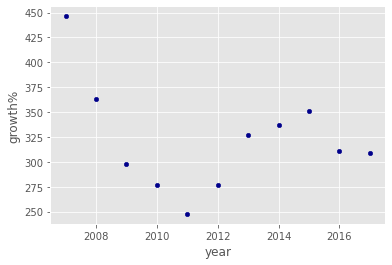

In [100]:
ax_IT = df_IT.plot.scatter(x='year',
                      y='growth%',
                      c='DarkBlue')

In [101]:
df_Cus = df_5000[df_5000['industry'] == 'Consumer Products & Services']
df_Cus = df_Cus.groupby('year', as_index=False)['growth%'].mean()
df_Cus

,year,growth%
0,2007,336.021027
1,2008,435.725117
2,2009,377.350910
3,2010,388.023549
4,2011,470.157826
5,2012,586.699548
6,2013,898.823513
7,2014,1360.156607
8,2015,649.207054
9,2016,825.884033


In [102]:
df_Gov = df_5000[df_5000['industry'] == 'Government Services']
df_Gov = df_Gov.groupby('year', as_index=False)['growth%'].mean()
df_Gov

,year,growth%
0,2007,365.236504
1,2008,574.718520
2,2009,461.522729
3,2010,655.524968
4,2011,586.499212
5,2012,481.280907
6,2013,694.931992
7,2014,603.340678
8,2015,469.517612
9,2016,491.380607


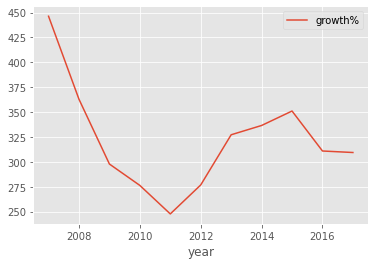

In [103]:
ax_IT_1 = df_IT.plot.line(x='year',
                      y='growth%')

In [104]:
df_Ret = df_5000[df_5000['industry'] == 'Retail']
df_Ret = df_Ret.groupby('year', as_index=False)['growth%'].mean()
df_Ret

,year,growth%
0,2007,309.455722
1,2008,314.764200
2,2009,264.956241
3,2010,387.455051
4,2011,443.953644
5,2012,436.898441
6,2013,621.279022
7,2014,523.276280
8,2015,929.276217
9,2016,736.329113


In [105]:
df_Food = df_5000[df_5000['industry'] == 'Food & Beverage']
df_Food = df_Food.groupby('year', as_index=False)['growth%'].mean()
df_Food

,year,growth%
0,2007,249.146947
1,2008,539.226276
2,2009,296.526981
3,2010,190.826875
4,2011,246.135559
5,2012,278.734522
6,2013,395.123143
7,2014,986.388400
8,2015,535.530834
9,2016,693.950353


In [106]:
df_his = pd.DataFrame({'Energy': list(df_energy_growth['growth%']), 
                       'Software': list(df_software_growth['growth%']),
                      'Cosumer': list(df_Cus['growth%']),
                       'Retail': list(df_Ret['growth%']),
                      'Food & Beverage': list(df_Food['growth%'])}, index= list(df_energy_growth['year']))

In [107]:
df_his

,Energy,Software,Cosumer,Retail,Food & Beverage
2007,379.449642,314.700373,336.021027,309.455722,249.146947
2008,539.850945,357.349821,435.725117,314.764200,539.226276
2009,526.802280,347.160814,377.350910,264.956241,296.526981
2010,584.599487,397.364500,388.023549,387.455051,190.826875
2011,626.654942,408.540625,470.157826,443.953644,246.135559
2012,830.702684,399.371665,586.699548,436.898441,278.734522
2013,895.689380,502.854970,898.823513,621.279022,395.123143
2014,947.759318,579.757886,1360.156607,523.276280,986.388400
2015,840.294512,561.124798,649.207054,929.276217,535.530834
2016,1042.451452,438.730211,825.884033,736.329113,693.950353


<AxesSubplot:>

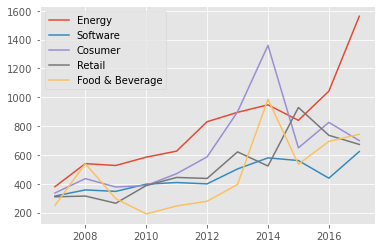

In [108]:
df_his.plot.line()

In [109]:
#df_software = df_5000[df_5000['industry'] == 'Software']
df_sfw_nyc = df_software[df_software['metro'] == 'New York City']
df_sfw_sfo = df_software[df_software['metro'] == 'San Francisco']
#df_nycccc.info()

#df_software_00_nyc = df_software_00.groupby('year', as_index=False)['growth%'].mean()
#df_Food

In [110]:
df_sfw_nyc_yearly = df_sfw_nyc.groupby('year', as_index=True)['year'].count()

In [111]:
df_sfw_sfo_yearly = df_sfw_sfo.groupby('year', as_index=True)['year'].count()

In [112]:
df_yearly = df_5000.groupby('year', as_index=True)['year'].count()

In [113]:
df_yearly_nyc = df_5000[df_5000['metro'] == 'New York City'].groupby('year', as_index=True)['year'].count()

In [114]:
#df_yearly_nyc

In [115]:
df_yearly_sfo = df_5000[df_5000['metro'] == 'San Francisco'].groupby('year', as_index=True)['year'].count()

In [116]:
df_yearly_sfo

year
2007     61
2008     87
2009    141
2010    160
2011    166
2012    168
2013    177
2014    167
2015    156
2016    144
2017    125
Name: year, dtype: int64

In [117]:
df_yearly

year
2007    2142
2008    3158
2009    4943
2010    4915
2011    4984
2012    4976
2013    4961
2014    4957
2015    4977
2016    4990
2017    4991
Name: year, dtype: int64

In [118]:
df_sfw_nyc_yearly

year
2007     9
2008    14
2009    25
2010    25
2011    23
2012    21
2013    23
2014    25
2015    27
2016    27
2017    21
Name: year, dtype: int64

In [119]:
df_sfw_sfo_yearly

year
2007     5
2008     4
2009    10
2010    11
2011    16
2012    21
2013    19
2014    25
2015    22
2016    16
2017    12
Name: year, dtype: int64

In [120]:
df_nyc_sfw_yearly_ratio = df_sfw_nyc_yearly/df_yearly_nyc

In [121]:
df_nyc_sfw_yearly_ratio

year
2007    0.062937
2008    0.064220
2009    0.067935
2010    0.061425
2011    0.059278
2012    0.058333
2013    0.063187
2014    0.062500
2015    0.064748
2016    0.067669
2017    0.057692
Name: year, dtype: float64

In [122]:
nyc_his = list(df_nyc_sfw_yearly_ratio)

In [123]:
nyc_his

[0.06293706293706294,
 0.06422018348623854,
 0.06793478260869565,
 0.06142506142506143,
 0.059278350515463915,
 0.058333333333333334,
 0.06318681318681318,
 0.0625,
 0.06474820143884892,
 0.06766917293233082,
 0.057692307692307696]

In [124]:
df_sfo_sfw_yearly_ratio = df_sfw_sfo_yearly/df_yearly_sfo

In [125]:
df_sfo_sfw_yearly_ratio

year
2007    0.081967
2008    0.045977
2009    0.070922
2010    0.068750
2011    0.096386
2012    0.125000
2013    0.107345
2014    0.149701
2015    0.141026
2016    0.111111
2017    0.096000
Name: year, dtype: float64

In [147]:
sfo_his = list(df_sfo_sfw_yearly_ratio)

In [148]:
sfo_his

[0.08196721311475409,
 0.04597701149425287,
 0.07092198581560284,
 0.06875,
 0.0963855421686747,
 0.125,
 0.10734463276836158,
 0.1497005988023952,
 0.14102564102564102,
 0.1111111111111111,
 0.096]

[Text(0, 0, 'NYC'), Text(0, 1, 'SFO')]

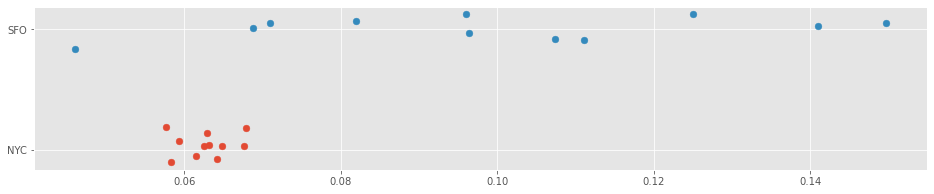

In [149]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(nyc_his, np.repeat(0, len(nyc_his)) + np.random.normal(0, 0.1, len(nyc_his)), s=45)
ax.scatter(sfo_his, np.repeat(1, len(sfo_his)) + np.random.normal(0, 0.1, len(sfo_his)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["NYC", "SFO"])

[Text(1, 0, 'NYC'), Text(2, 0, 'SFO')]

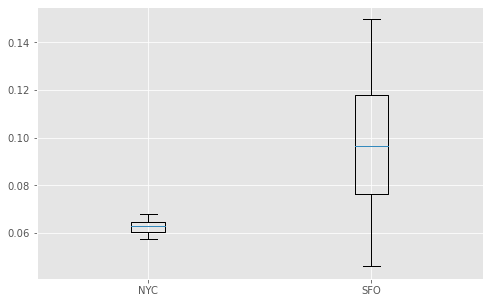

In [150]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([nyc_his, sfo_his])
ax.set_xticks([1,2])
ax.set_xticklabels(["NYC", "SFO"])

In [151]:
#The data looks like Nick can consistently kickflip higher than Matt, but let's construct a formal test of this

In [152]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [153]:
test_statistic = welch_test_statistic(sfo_his, nyc_his)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 4.01


Text(0.5, 1.0, "Student's t-distributions")

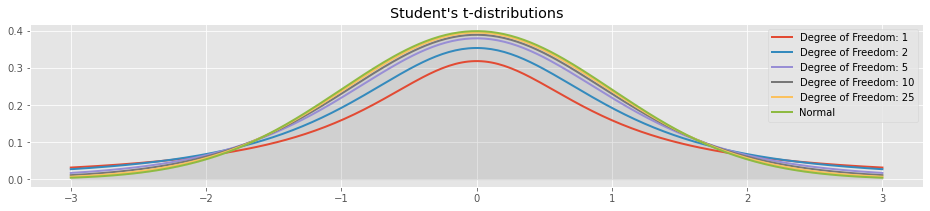

In [162]:
dfs = [1, 2, 5, 10, 25]
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))

normal = stats.norm(0, 1)
ax.fill_between(x, normal.pdf(x), color="grey", alpha=0.2)
for df in dfs:
    students = stats.t(df)
    ax.plot(x, students.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.plot(x, normal.pdf(x), linewidth=2, label="Normal")
ax.legend()
ax.set_title("Student's t-distributions")

In [163]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [164]:
df = welch_satterhwaithe_df(sfo_his, nyc_his)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 10.23


Text(0.5, 1.0, 'p-value Region')

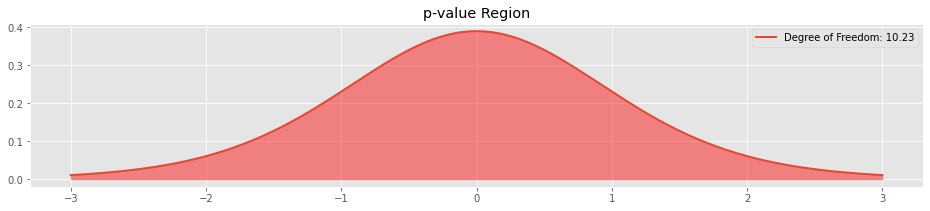

In [172]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region")

In [170]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value of location choice difference for Software company: {:2.4f}".format(p_value))

p-value of location choice difference for Software company: 1.9976


In [171]:
test_statistic = welch_test_statistic(sfo_his, nyc_his)
# print(test_statistic)
p_value = 1 - students.cdf(test_statistic)
print("p-value for SFO is more favorable than NYC in Software company's eyes: {:2.4f}".format(p_value))

p-value for SFO is more favorable than NYC in Software company's eyes: 0.0012


In [169]:
statsmodels.stats.power.tt_ind_solve_power(effect_size=None, nobs1=None, alpha=None, 
                                           power=None, ratio=1.0, alternative='two-sided')¶

SyntaxError: invalid character in identifier (<ipython-input-169-928cdbb7e4e7>, line 2)